# time series
-  Time Series Plot

In [82]:
import numpy as np
import pandas as pd
from pydataset import data
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates

In [36]:
# create dates in a range
date1 = pd.date_range(start = '2024-1-1', periods=100)
date1

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-12',
               '2024-01-13', '2024-01-14', '2024-01-15', '2024-01-16',
               '2024-01-17', '2024-01-18', '2024-01-19', '2024-01-20',
               '2024-01-21', '2024-01-22', '2024-01-23', '2024-01-24',
               '2024-01-25', '2024-01-26', '2024-01-27', '2024-01-28',
               '2024-01-29', '2024-01-30', '2024-01-31', '2024-02-01',
               '2024-02-02', '2024-02-03', '2024-02-04', '2024-02-05',
               '2024-02-06', '2024-02-07', '2024-02-08', '2024-02-09',
               '2024-02-10', '2024-02-11', '2024-02-12', '2024-02-13',
               '2024-02-14', '2024-02-15', '2024-02-16', '2024-02-17',
               '2024-02-18', '2024-02-19', '2024-02-20', '2024-02-21',
               '2024-02-22', '2024-02-23', '2024-02-24', '2024-02-25',
      

In [37]:
len(date1)

100

In [38]:
coyA = np.random.randint(low=50, high=100, size=(100))
coyB = np.random.randint(low=50, high=100, size=(100))
#coyB = (np.random.sample(range(50,100, len(date1)))*100).round(0)
print(coyA, coyB, len(coyA), len(coyB))

[79 74 87 59 90 92 91 63 69 93 79 70 64 90 51 50 51 69 77 59 58 51 95 76
 50 83 64 98 88 97 86 52 92 57 81 65 57 96 69 70 55 58 51 67 80 99 79 85
 90 69 89 91 91 56 71 78 94 63 51 73 63 73 83 73 79 75 93 53 94 87 97 63
 74 98 65 74 84 77 85 82 76 97 60 67 54 53 60 69 94 91 64 60 98 73 76 88
 66 66 60 59] [53 59 96 89 81 51 87 78 68 96 70 87 68 77 97 93 58 57 97 82 83 73 83 75
 66 71 54 79 83 99 66 72 87 66 70 54 95 52 72 66 75 87 68 82 70 74 60 67
 82 72 63 99 77 78 85 67 74 62 52 89 65 80 56 82 91 50 73 75 51 69 77 69
 52 65 88 64 51 72 55 52 54 50 79 53 92 94 90 96 72 99 64 80 61 95 56 64
 66 56 98 60] 100 100


In [39]:
df = pd.DataFrame({'saleDate':date1, 'saleA':pd.Series(coyA), 'saleB':pd.Series(coyB)})

In [40]:
df.head()

,saleDate,saleA,saleB
0,2024-01-01,79,53
1,2024-01-02,74,59
2,2024-01-03,87,96
3,2024-01-04,59,89
4,2024-01-05,90,81


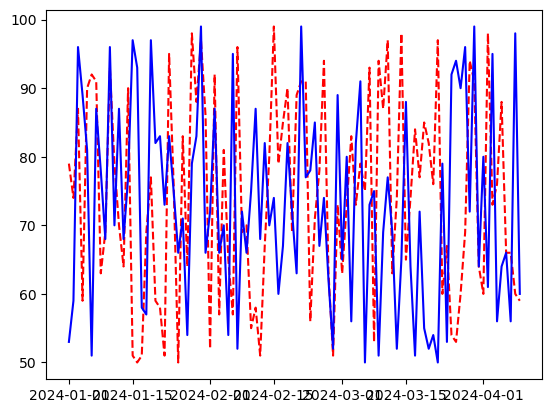

In [52]:
#sale A
plt.plot(df.saleDate, df.saleA, color='red', linestyle='dashed')
plt.plot(df.saleDate, df.saleB, color='blue')
plt.show()

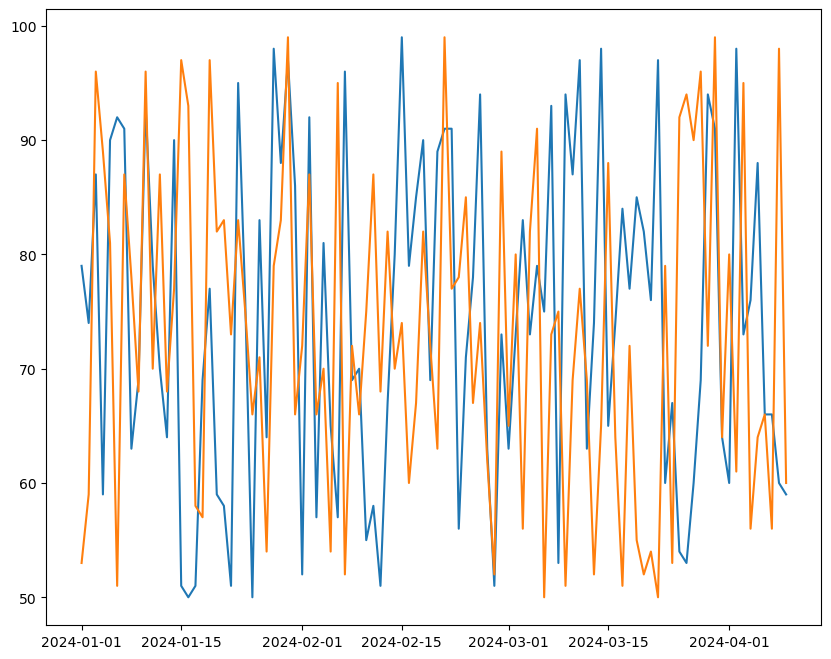

In [46]:
# using loop
plt.figure(figsize=(10,8))
for col in ['saleA', 'saleB']:
    plt.plot(df.saleDate, df[col])

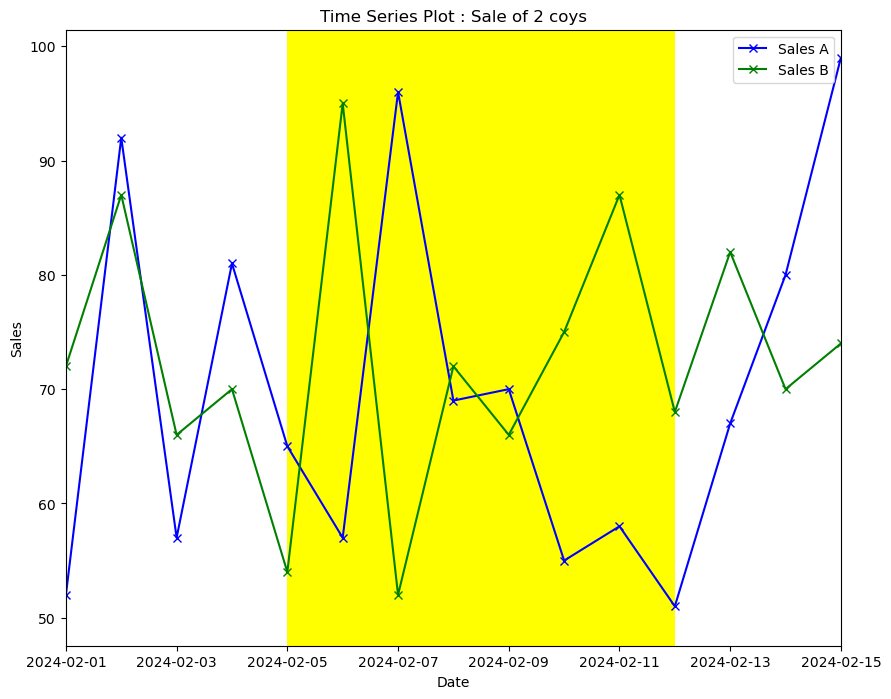

In [64]:
plt.figure(figsize=(10,8))
for col in ['saleA', 'saleB']:
    if col == 'saleA':
        label1, color1 = 'Sales A', 'blue'
    else:
        label1, color1 = 'Sales B', 'green'
    plt.plot(df.saleDate, df[col], marker='x', label=label1, color=color1)
plt.xlim(pd.Timestamp('2024-2-1'), pd.Timestamp('2024-2-15'))
plt.title('Time Series Plot : Sale of 2 coys')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.axvspan(dt.datetime(2024,2,5), dt.datetime(2024,2,12), facecolor='yellow')
plt.show();

In [71]:
# grouping times by week or month
dfWeekSales = df.groupby(pd.Grouper(key='saleDate', freq='W')).agg(avgSalesA = ('saleA','mean'), avgSalesB = ('saleB', 'mean'), sumSalesA = ('saleA','sum'), sumSalesB = ('saleB','sum'))

In [75]:
dfWeekSales = dfWeekSales.round()
dfWeekSales.head()

,avgSalesA,avgSalesB,sumSalesA,sumSalesB
saleDate,,,,
2024-01-07,82.0,74.0,572,516
2024-01-14,75.0,78.0,528,544
2024-01-21,59.0,81.0,415,567
2024-01-28,74.0,72.0,517,501
2024-02-04,79.0,78.0,553,543


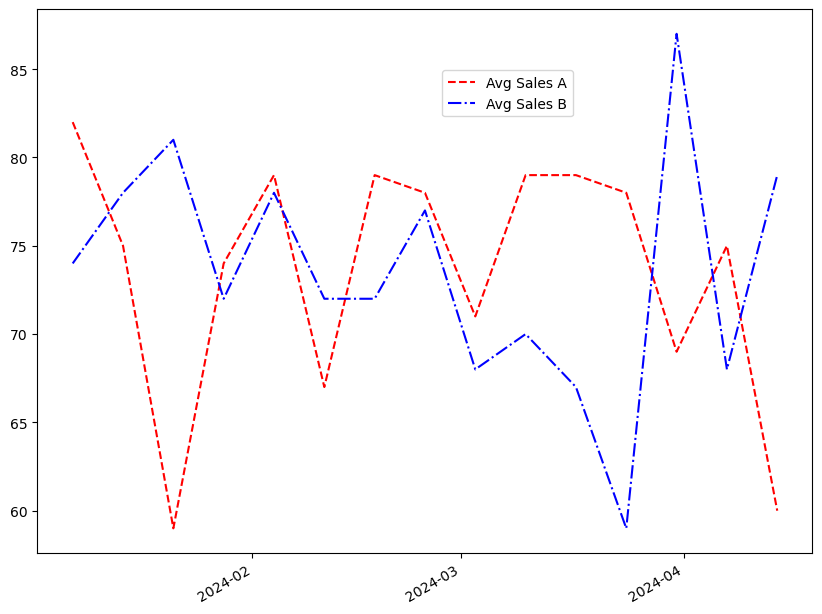

In [94]:
#Week Sum Sales
fig, ax= plt.subplots(figsize=(10,8))
ax.plot(dfWeekSales.avgSalesA, color='red', linestyle='dashed', label='Avg Sales A')
ax.plot(dfWeekSales.avgSalesB, color='blue', linestyle='dashdot', label='Avg Sales B')
mlocator = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(mlocator) # Locator for major axis only.
fig.autofmt_xdate()
plt.legend(bbox_to_anchor=(.7,.9))
plt.show();
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html